# 03 - Model Explainability with SHAP

This notebook explains the trained model using SHAP values.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
import warnings 
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Load data
df = pd.read_csv('../data/raw/application_train.csv')

# Drop rows with missing target and preprocess
df = df.dropna(subset=['TARGET'])
from preprocessing import preprocess_data
df = preprocess_data(df)

X = df.drop('TARGET', axis=1)


In [7]:

model = joblib.load('../models/credit_risk_model.pkl')
# Compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)


100%|===================| 307164/307511 [06:45<00:00]        

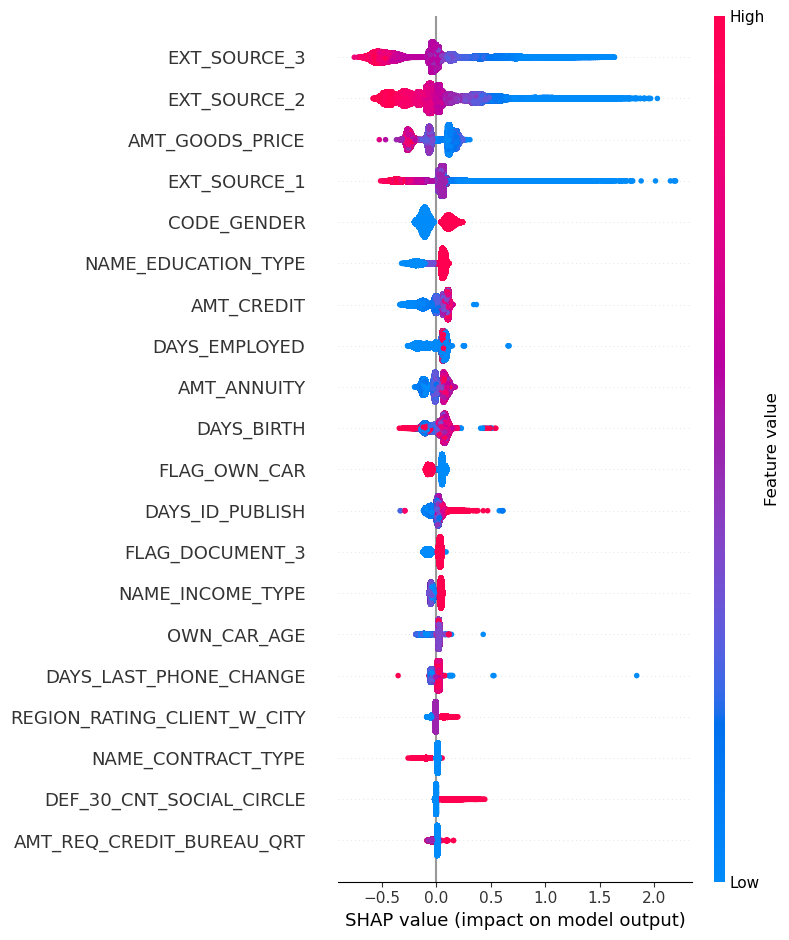

In [8]:

# Summary plot
shap.summary_plot(shap_values, X)


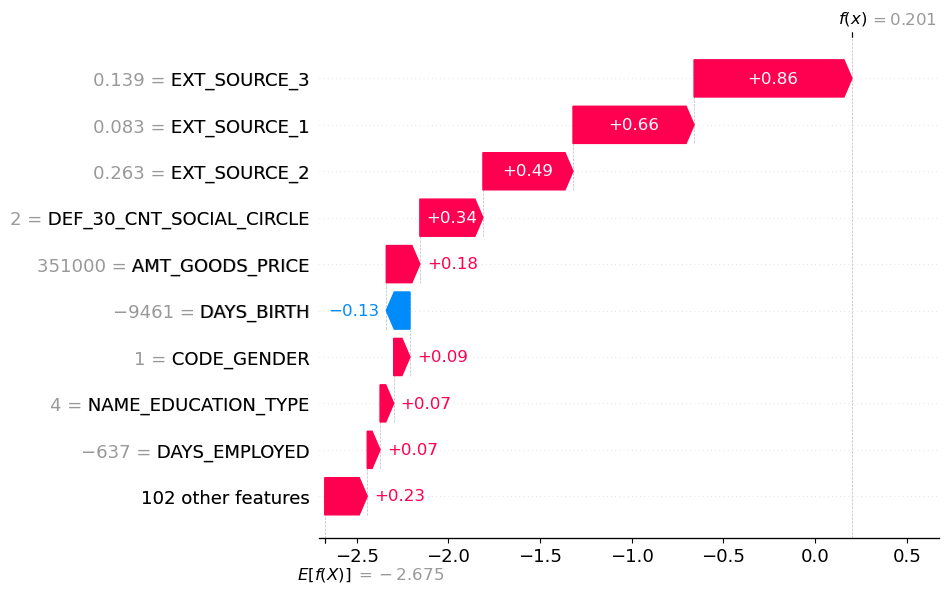

In [9]:
# Waterfall plot for a single prediction
i = 0  # We can change index to explore other rows
shap.plots.waterfall(shap_values[i])


In [5]:

model = joblib.load('../models/credit_risk_model_xgboost.pkl')
import numpy as np

# Use TreeExplainer directly
explainer = shap.TreeExplainer(model)

# Convert to NumPy if needed
X_np = X.values if hasattr(X, "values") else np.array(X)


shap_values = explainer.shap_values(X_np)


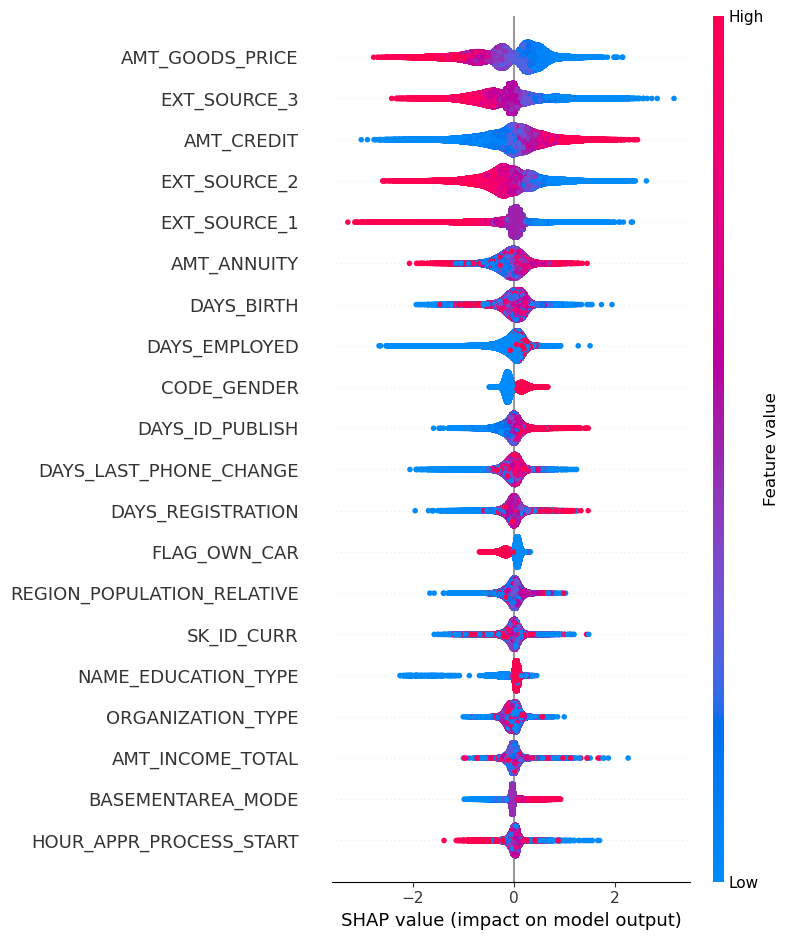

In [6]:
# Summary plot
shap.summary_plot(shap_values, X)

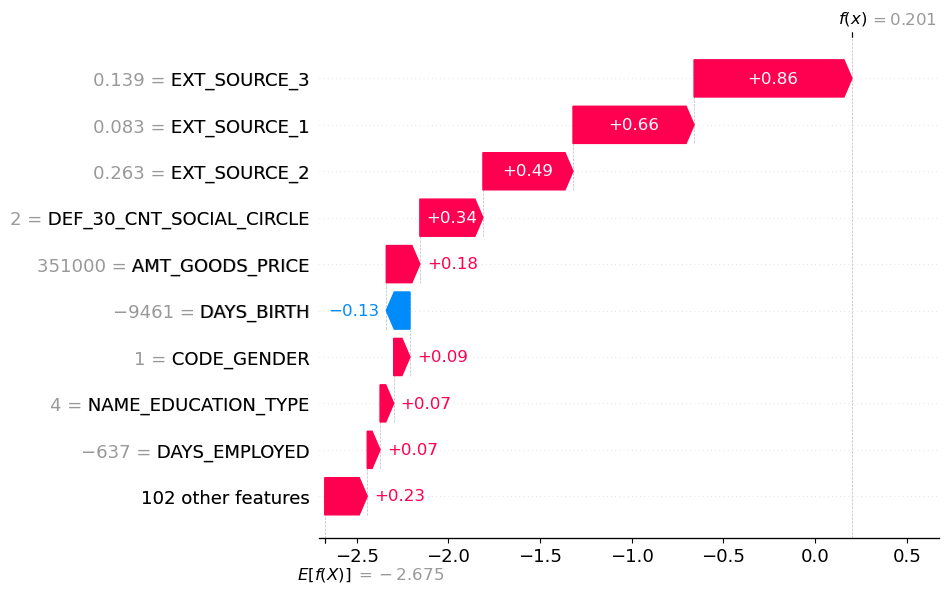

In [9]:
i = 0  
shap.plots.waterfall(shap_values[i])